# Approfondissement sur les distributions 1D



## Résumé

Dans ce notebook, nous présentons les aspects suivants :

- les lois associées à plusieurs paramétrages,
- arithmétique et fonctions de distributions,
- utiliser la classe `CompositeDistribution` pour les fonctions plus générales,
- créer sa propre distribution avec la classe `PythonDistribution`,
- tronquer une distribution avec `TruncatedDistribution`.

TODO:

- Créer un exercice sur la méthode `computeMinimumVolumeLevelSet()`

[Pour voir ce Jupyter Notebook, nous conseillons NBViewer.](https://nbviewer.org/github/mbaudin47/otsupgalilee-eleve/blob/master/2-Quantification/Exercice-Approfondissement-distributions-1D.ipynb)


**Références**

- Papoulis, A. and Pillai, S. (2002). Probability, random variables and stochastic processes, 4th edition. Mc Graw Hill.

In [1]:
import openturns as ot
import numpy as np

## Lois avec plusieurs paramétrages

`OpenTURNS` fournit plusieurs distributions univariées :

 - `Beta`, 
 - `Uniform`
 - `Normal`, 
 - `LogNormal`
 - `Exponential`, 
 - `Weibull`,
 - etc.
 
Ces distributions utilisent un paramétrage *natif*. Pour certaines distributions, d'autres paramétrages peuvent être utilisés pour définir la distribution.

Par exemple, la loi beta possède plusieurs paramétrages. 
Le paramétrage natif de la loi beta utilise les paramètres suivants :
- $\alpha$ : le premier paramètre de forme, $\alpha>0$,
- $\beta$ : le second paramètre de forme, $\beta>0$,
- $a$ : la borne inférieure,
- $b$ : la borne supérieure avec $a<b$.

La densité de probabilité de la loi beta est :
$$
f(x) = \frac{(x-a)^{\alpha-1}(b-x)^{\beta-1}}{(b-a)^{\alpha+\beta-1} B(\alpha,\beta)}
$$
pour tout $x\in[a,b]$, où $B$ est la fonction beta d'Euler. 
Pour tout $y,z>0$, la fonction beta est définie par :
$$
B(y,z) = \int_0^1 t^{y-1} (1-t)^{z-1} dt.
$$
La classe `Beta` utilise le paramétrage natif.

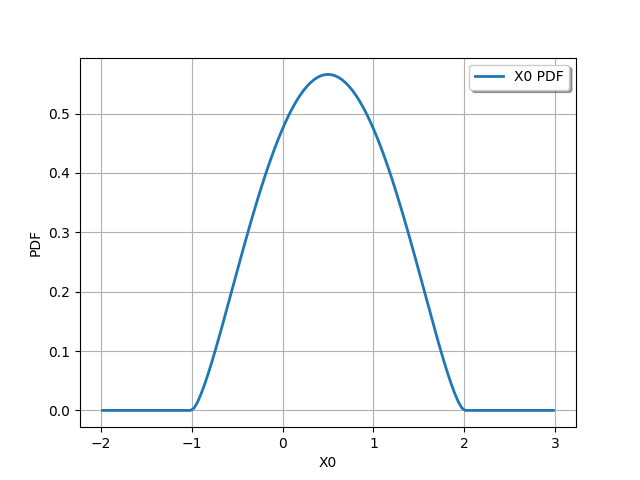

In [2]:
dist = ot.Beta(2.5, 2.5, -1.0, 2.0)
dist.drawPDF()

La classe `BetaMuSigma` fournit un autre paramétrage de la loi beta, fondé sur l'espérance $\mu$ et l'écart-type $\sigma$ de la variable.

En effet, la moyenne et la variance de la loi beta sont :
$$
\mu = a + (b-a) \frac{\alpha}{\alpha+\beta}
$$
et :
$$
\sigma^2 = (b-a)^2 \frac{\alpha \beta}{(\alpha+\beta)^2 (\alpha+\beta  + 1)}.
$$
En inversant les relations, on obtient :
$$
\alpha = \frac{\mu - a}{b-a} \left(\frac{(b-\mu)(\mu-a)}{\sigma^2} - 1\right)
$$
et :
$$
\beta = \alpha \frac{b - \mu}{\mu-a} .
$$
La session suivante crée une loi beta de paramètres $\mu=0.2$, $\sigma=0.6$, $a=-1$ et $b=2$.

In [3]:
parameters = ot.BetaMuSigma(0.2, 0.6, -1.0, 2.0)
parameters.evaluate()

class=Point name=Unnamed dimension=4 values=[2,3,-1,2]

La classe `ParametrizedDistribution` permet de créer une distribution en fonction d'un paramétrage.

In [4]:
param_dist = ot.ParametrizedDistribution(parameters)
param_dist

class=ParametrizedDistribution parameters=class=BetaMuSigma name=Unnamed mu=0.2 sigma=0.6 a=-1 b=2 distribution=class=Beta name=Beta dimension=1 alpha=2 beta=3 a=-1 b=2

## Arithmétique des distributions et fonctions de distributions 1D

`OpenTURNS` implémente l'algèbre des distributions univariées :

 - `+`, 
 - `-`,
 - `*`, 
 - `/`.

Il fournit aussi les fonctions suivantes :

 - `sin`, 
 - `cos`, 
 - `acos`, 
 - `asin`
 - `square`, 
 - `inverse`, 
 - `sqrt`.

Dans l'exemple suivant, on crée une variable beta et une variable exponentielle, puis on crée la variable associée à la somme de ces deux variables aléatoires.

In [5]:
B = ot.Beta(5.0, 2.0, 9.0, 10.0)

E = ot.Exponential(3.0)

S = B + E
S.setDescription(["Sum"])  # Optionnel
print(S)

RandomMixture(Beta(alpha = 5, beta = 2, a = 9, b = 10) + Exponential(lambda = 3, gamma = 0))


Dans ce cas, la variable `S` est une distribution de type `RandomMixture`. Dans le cas d'une somme de deux variables aléatoires indépendantes, elle implémente la convolution de `B` et `E`. Plus de détails sur ce sujet sont présentés (Papoulis et Pillai, 2002) page 182.

Le script suivant permet de dessiner la PDF et la CDF de la variable associée à la somme.

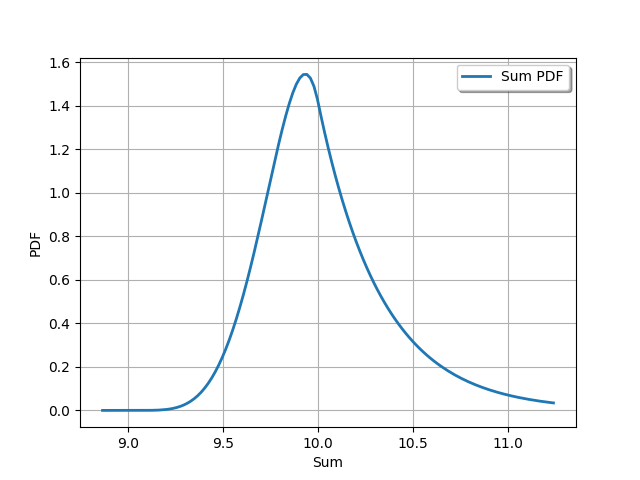

In [6]:
S.drawPDF()

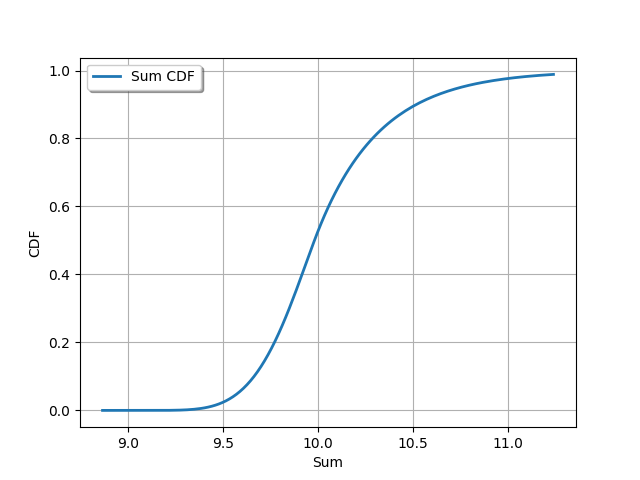

In [7]:
S.drawCDF()

## La classe `CompositeDistribution`  pour les distributions plus générales

Des distributions plus complexes peuvent être définies grâce à la classe `CompositeDistribution` qui nécessite une fonction `g`. La classe `CompositeDistribution` permet de créer la distribution de la variable $Y = g(X)$ où $X$ est une variable aléatoire (i.e. unidimensionnelle) et $g:\mathbb{R} \rightarrow \mathbb{R}$ est une fonction.

Plus de détails sur ce sujet sont présentés dans (Papoulis et Pillai, 2002) page 130.

On commence par définir une variable aléatoire `N` de loi Gaussienne de moyenne $\mu=0$ et d'écart-type $\sigma=1$.

In [8]:
N = ot.Normal(0.0, 1.0)
N.setDescription(["Normal"])

Puis on définit la fonction $f$ grâce à la fonction exponentielle. 

In [9]:
f = ot.SymbolicFunction(["x"], ["exp(x)"])
f.setDescription(["X", "Exp(X)"])

Enfin, on définit la distribution $Y=\exp(X)$. Par définition, il s'agit de la loi log-normale, de paramètres $\mu=0$ et $\sigma=1$ (il existe d'autres manières de paramétrer la loi log-normale).

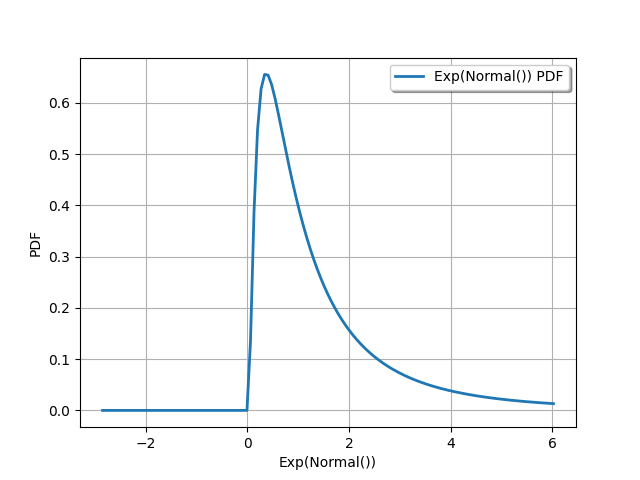

In [10]:
dist = ot.CompositeDistribution(f, N)
dist.setDescription(["Exp(Normal())"])

dist.drawPDF()

Pour vérifier la distribution précédente, on compare avec la distribution `LogNormal`.

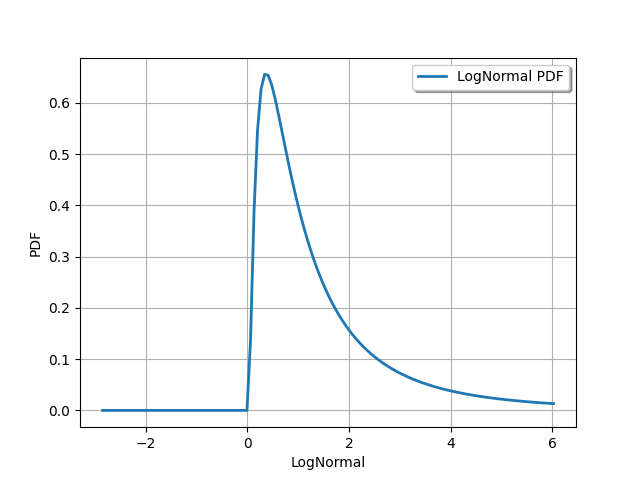

In [11]:
LN = ot.LogNormal()
LN.setDescription(["LogNormal"])
LN.drawPDF()

## La classe `PythonDistribution`

On peut définir notre propre `Distribution` avec la classe `PythonDistribution`.  Dans ce cas, il est nécessaire de définir la fonction de répartition et le support de la distribution.

Par exemple, implémentons le noyau `Quartic`, un noyau souvent utilisé dans le contexte de l'estimation non paramétrique. La densité de probabilité est :

$$
f(u) = \frac{15}{16} (1 - u^2)^2
$$

pour tout $u\in[-1,1]$ et $f(u)=0$ sinon. On développe le carré précédent, et on obtient :

$$
f(u) = \frac{15}{16} (1 - 2 u^2 + u^4)
$$

pour tout $u\in[-1,1]$. On intègre l'équation précédente, ce qui mène à la fonction de répartition :

$$
F(u) = \frac{1}{2} + \frac{15}{16} u - \frac{5}{8} u^3 + \frac{3}{16} u^5
$$

pour tout $u\in[-1,1]$, $F(u)=0$ si $u\geq -1$ et $F(u)=1$ si $u\geq 1$. La seule méthode de calcul requise est `computeCDF`. Mais puisque la densité est ici facile à implémenter, nous la définisson également. Ici, la distribution est définie sur l'intervalle $[-1,1]$ que nous implémentons dans la méthode `getRange()`.

**Référence**

- https://en.wikipedia.org/wiki/Kernel_%28statistics%29

In [12]:
class Quartic(ot.PythonDistribution):
    def __init__(self):
        super().__init__(1)
        self.c = 15.0 / 16.0

    def computeCDF(self, x):
        u = x[0]
        if u <= -1.0:
            p = 0.0
        elif u >= 1.0:
            p = 1.0
        else:
            p = 0.5 + self.c * u - 5.0 / 8.0 * u**3 + 3.0 / 16.0 * u**5
        return p

    def computePDF(self, x):
        u = x[0]
        if u < -1.0 or u > 1.0:
            y = 0.0
        else:
            y = self.c * (1.0 - u**2) ** 2
        return y

    def getRange(self):
        return ot.Interval(-1.0, 1.0)

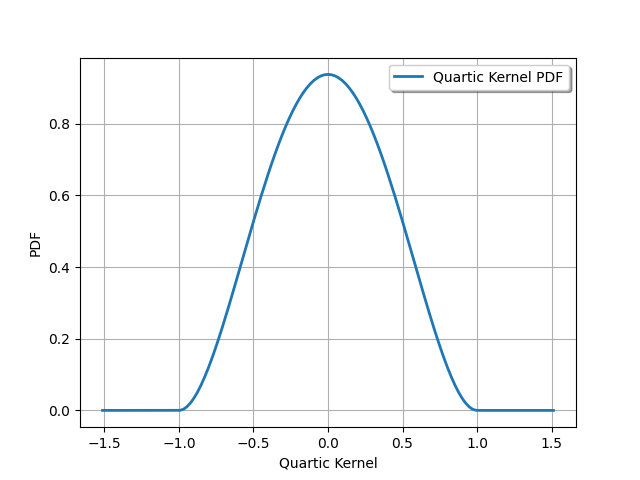

In [13]:
Q = ot.Distribution(Quartic())
Q.setDescription(["Quartic Kernel"])

Q.drawPDF()

## Tronquer une distribution

Toute distribution peut être tronquée grâce à la classe `TruncatedDistribution`. 

Soit $f_X$ (resp. $F_X$) la densité de probabilité (resp. la fonction de répartition) de la variable aléatoire réelle $X$. Soient $a$ et $b$ deux réels avec $a<b$. Soit $Y$ la variable aléatoire associée à la troncature de $X$ dans l'intervalle $[a,b]$. Alors, la densité de probabilité de $Y$ est :
$$
f_Y(y) = \frac{f_X(y)}{F_X(b) - F_X(a)}
$$
si $y\in[a,b]$ et $f_Y(y)=0$ sinon. 


Considérons par exemple la variable gaussienne $X$ de moyenne $\mu=0$ et d'écart-type $\sigma=1$. 

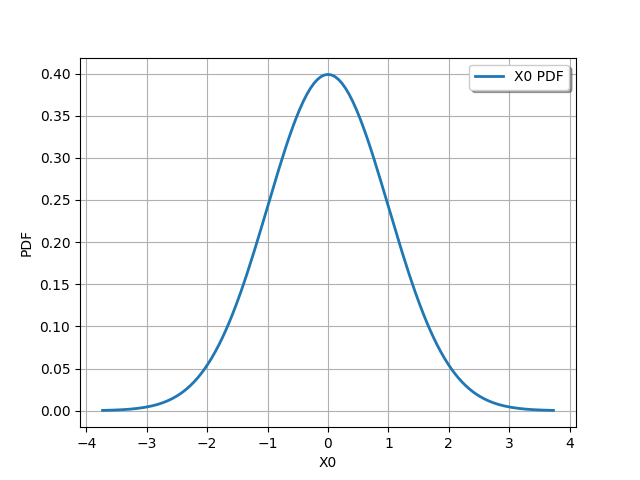

In [14]:
X = ot.Normal()
X.drawPDF()

On peut tronquer la distribution entre -1 et 2. On observe que la densité de probabilité tronquée devient discontinue aux points de troncature -1 et 2.

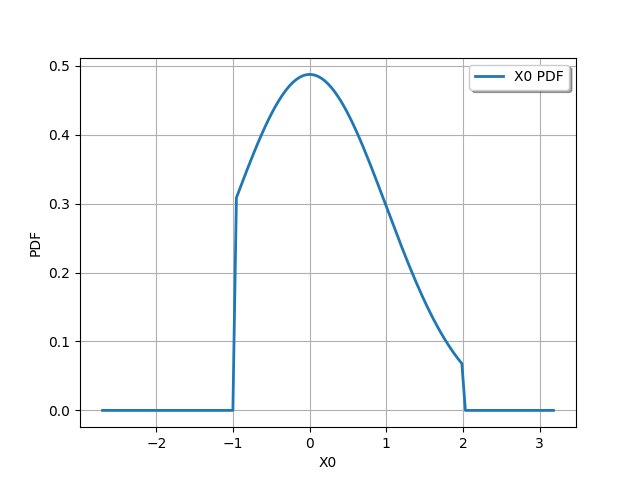

In [15]:
Y = ot.TruncatedDistribution(X, -1.0, 2.0)
Y.drawPDF()

On peut également tronquer une distribution avec une borne inférieure.

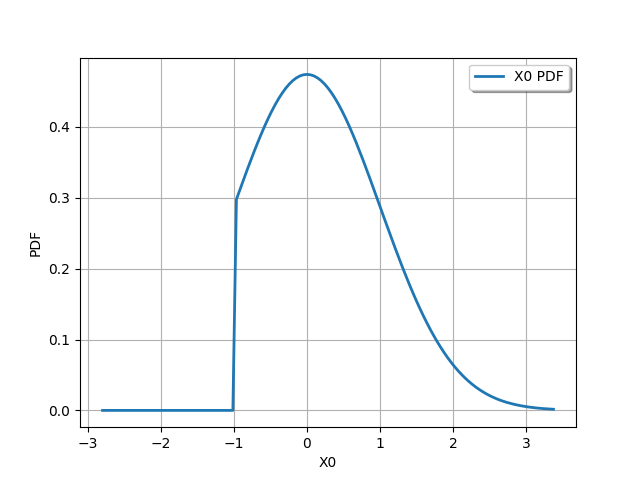

In [16]:
Y = ot.TruncatedDistribution(X, -1.0, ot.TruncatedDistribution.LOWER)
Y.drawPDF()

On peut enfin tronquer une distribution avec une borne supérieure.

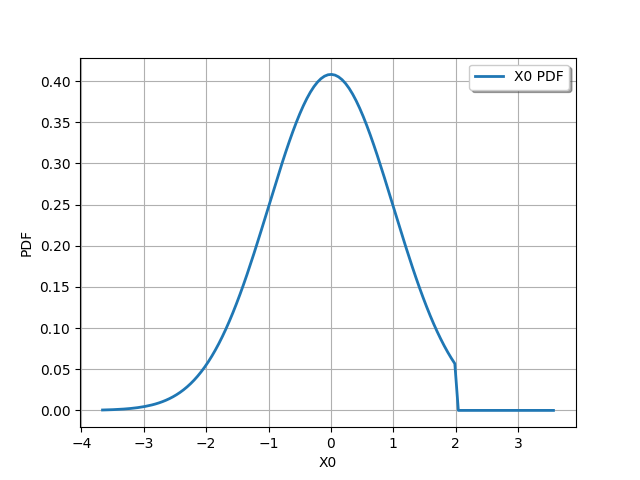

In [17]:
Y = ot.TruncatedDistribution(X, 2.0, ot.TruncatedDistribution.UPPER)
Y.drawPDF()

## Exercice 1 : produit

Nous souhaitons calculer la distribution du produit d'une loi uniforme et d'une loi gaussienne.
- Définir la variable `U` suivant une loi uniforme avec pour bornes a = 0, b = 1.
- Définir la variable `N` suivant une loi normale avec pour paramètres 0 et 1.
- Définir la variable `Z = U * N` en utilisant l'opérateur arithmétique `*`.
- Tracer la densité de probabilité de `Z`.

## Exercice 2 : poutre sollicitée axialement

Nous considérons une poutre simple sollicitée par une charge de traction F aux deux extrémités.

<img src="axial-stressed-beam.png" width="250">

La géométrie est supposée déterministe. Le diamètre D est :
$$
D=0.02 \textrm{ (m)}.
$$

Par définition, la contrainte est la charge divisée par la surface. Puisque la surface est $\pi D^2/4$, la contrainte est :
$$
S = \frac{F}{\pi D^2/4}.
$$
On considère que la défaillance survient lorsque la poutre plastifie, c'est-à-dire lorsque la contrainte axiale devient supérieure à la limite d'élasticité :
$$
R - \frac{F}{\pi D^2/4} \leq 0
$$
où $R$ est la résistance. Par conséquent, la fonction d'état limite $g$ est : 
$$
g(R,F) = R - \frac{F}{\pi D^2/4},
$$
pour tout $R,F\in\mathbb{R}$.
Les valeurs du paramètre $D$ impliquent :
$$
D^2/4 = 10^{-4},
$$
ce qui conduit à l'équation :
$$
g(R,F) = R - \frac{F}{10^{-4} \pi}.
$$

Nous considérons les lois de distribution suivantes.

* R : LogNormale($\mu_R=3\times 10^6$, $\sigma_R=3\times 10^5$) [Pa]
* F : Normale($\mu_F=750$, $\sigma_F=50$) [N]

où $\mu_R = \mathbb{E}[R]$ et $\sigma_R = \sqrt{\operatorname{Var}(R)}$ sont la moyenne et l'écart-type de $R$. La _probabilité de défaillance_ (d'où le « pf ») est : 
$$
p_f = \mathbb{P}(g(R,F) \leq 0).
$$

La valeur exacte de $p_f$ est 
$$
p_f = 0.02920.
$$

L'objectif de l'exercice est de calculer $p_f$. 

**Questions.**

- Définir la variable aléatoire `F` associée à $F$. Tracer sa densité de probabilité.
- Définir la variable aléatoire `R` associée à $R$. Pour ce faire, utiliser la classe LogNormalMuSigma pour définir les paramètres, puis créer la distribution avec `ParametrizedDistribution`. Tracer sa densité de probabilité.
- Définir la variable déterministe `D` associée au diamètre de la poutre.
- Définir la variable aléatoire `g` associée à l'équation $g(R, F) = R - \frac{F}{\pi D^2/4}$, en utilisant l'opérateur arithmétique `-`.
- Calculer la probabilité $p_f = \mathbb{P}(g(R, F) \leq 0)$.

## Exercice 3 : la distribution uniforme

L'objectif de cet exercice est d'utiliser la classe `PythonDistribution` pour créer la nouvelle distribution `UDistribution` implémentant la loi uniforme. La fonction de répartition de la loi uniforme est:
$$
\mathbb{P}(X\leq x) = 
\begin{cases}
0               & \textrm{ si } x\leq a, \\
\frac{x-a}{b-a} & \textrm{ si } x\leq b, \\
1               & \textrm{ sinon}.
\end{cases}
$$

**Questions.**
- Créer la classe `UDistribution` dérivant de la classe `PythonDistribution`.
- Créer le constructeur de la classe, c'est à dire la méthode `__init__`.
- Créer la méthode `computeCDF` qui calcule la fonction de répartition.

Pour vous aider, nous vous fournissons un squelette de solution, dans lequel vous compléterez les sections de code `TODO`.

```python
class UDistribution(ot.PythonDistribution):
    def __init__(self, a, b):
        super().__init__(TODO)
        TODO

    def computeCDF(self, x):
        u = x[0]
        if TODO:
            p = TODO
        elif TODO:
            p = TODO
        else:
            p = TODO
        return p
```

## Exercice 4 : un débit positif

On considère la variable $Q$ associée au débit d'une rivière ($m^3/s$). On fait l'hypothèse qu'il s'agit du débit maximal annuel. C'est pourquoi nous choisissons de modéliser cette variable par la loi de Gumbel de paramètres suivants :
- échelle=500, 
- mode=900.

De plus, le débit est une variable positive de telle sorte que la distribution doit être tronquée avec une borne inférieure.

L'objectif de cet exercice est de définir la variable aléatoire $Q$ associée à cette distribution.

**Questions.**

- Utiliser la classe `Gumbel` pour définir les paramètres de la loi de Gumbel associée `Quntruncated`. 
- Dessiner la PDF de `Quntruncated`.
- Utiliser la classe `TruncatedDistribution` pour créer la variable `Q` associée à la loi de Gumbel tronquée. 
- Dessiner la PDF de `Q` : que remarquez-vous ?